In [47]:
import pandas as pd

df = pd.read_csv('tract_data.csv')
df.head()



,FID,Name,TotChild,OlderAdult,MedIllnes,POC2,LEP,Low_to_No,TotDis,MBTA_Stops_Count,Bus_Stops_Count,Blue_Bikes_Stations_Count,Blue_Bikes_Docks_Count,Air_Quality_Tooltip
0,1,Mission Hill,60,331,2131.22,1755,1522,1191,470,5,9,1,15,NO2: 29.223146067415733<br>O3: 19.595730337078...
1,2,Fenway,77,56,2201.14,1749,2443,2387,299,0,1,1,15,NO2: 29.223146067415733<br>O3: 19.595730337078...
2,3,Back Bay,281,390,1214.76,447,462,72,84,0,0,0,0,NO2: 24.54629213483146<br>O3: 19.6618539325842...
3,4,Back Bay,86,285,1014.20,320,472,187,45,1,4,4,72,NO2: 24.54629213483146<br>O3: 19.6618539325842...
4,5,Fenway,13,36,1181.78,1039,931,895,131,1,7,4,72,NO2: 23.43455056179776<br>O3: 19.6766853932584...


In [48]:
air_quality_columns = df['Air_Quality_Tooltip'].str.split('<br>', expand=True)
air_quality_columns = air_quality_columns.iloc[:, :-1]

air_quality_columns.columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'SO2', 'AQI', 'Category', 'ZipCode']

def extract_value(row, col_name):
    try:
        value = row.split(f'{col_name}: ')[1]
    except IndexError:
        value = None
    return value

for col in air_quality_columns.columns:
    air_quality_columns[col] = air_quality_columns.apply(lambda row: extract_value(row[col], col), axis=1)

df = pd.concat([df, air_quality_columns], axis=1)
df.drop(columns=['Air_Quality_Tooltip'], inplace=True)
df.head(50)

,FID,Name,TotChild,OlderAdult,MedIllnes,POC2,LEP,Low_to_No,TotDis,MBTA_Stops_Count,...,Blue_Bikes_Stations_Count,Blue_Bikes_Docks_Count,NO2,O3,PM10,PM2.5,SO2,AQI,Category,ZipCode
0,1,Mission Hill,60,331,2131.22,1755,1522,1191,470,5,...,1,15,29.223146067415733,19.595730337078653,32.15174157303371,13.568876404494382,0.2462359550561797,52.01685393258427,Moderate air quality,2115
1,2,Fenway,77,56,2201.14,1749,2443,2387,299,0,...,1,15,29.223146067415733,19.595730337078653,32.15174157303371,13.568876404494382,0.2462359550561797,52.01685393258427,Moderate air quality,2115
2,3,Back Bay,281,390,1214.76,447,462,72,84,0,...,0,0,24.54629213483146,19.66185393258427,22.283932584269664,11.412640449438202,0.2687640449438202,44.88202247191011,Good air quality,2116
3,4,Back Bay,86,285,1014.20,320,472,187,45,1,...,4,72,24.54629213483146,19.66185393258427,22.283932584269664,11.412640449438202,0.2687640449438202,44.88202247191011,Good air quality,2116
4,5,Fenway,13,36,1181.78,1039,931,895,131,1,...,4,72,23.43455056179776,19.676685393258428,31.163764044943814,9.611460674157303,0.2278089887640449,38.061797752808985,Good air quality,2215
5,6,Back Bay,232,428,1245.52,517,737,309,109,0,...,0,0,24.538483146067417,19.60376404494382,25.192078651685392,10.348483146067416,0.2798876404494382,41.00561797752809,Good air quality,2199
6,7,Back Bay,85,382,1865.37,1664,1406,1024,238,1,...,3,51,29.223146067415733,19.595730337078653,32.15174157303371,13.568876404494382,0.2462359550561797,52.01685393258427,Moderate air quality,2115
7,8,Allston,31,31,1029.60,1083,1771,1740,99,3,...,1,15,24.231629213483146,19.90612359550562,27.68831460674157,10.316910112359553,0.2320224719101123,41.59550561797753,Good air quality,2134
8,9,Brighton,35,837,2113.60,1123,2804,1967,700,1,...,1,15,23.04308988764045,20.122865168539324,26.64601123595505,9.72073033707865,0.2541573033707865,38.7752808988764,Good air quality,2135
9,10,Allston,142,113,1802.25,1928,1673,1560,301,1,...,1,15,24.231629213483146,19.90612359550562,27.68831460674157,10.316910112359553,0.2320224719101123,41.59550561797753,Good air quality,2134


In [31]:
df.shape

(180, 21)

In [51]:
import pandas as pd

def avg_aqi(values):
    numeric_values = pd.to_numeric(values, errors='coerce')
    return numeric_values.mean()

def most_common(series):
    try:
        return series.mode().iloc[0]
    except IndexError:
        return None

grouped = df.groupby('Name').agg({
    'TotChild': 'sum',
    'OlderAdult': 'sum',
    'MedIllnes': 'sum',
    'POC2': 'sum',
    'LEP': 'sum',
    'Low_to_No': 'sum',
    'TotDis': 'sum',
    'MBTA_Stops_Count': 'sum',
    'NO2': avg_aqi,  
    'O3': avg_aqi, 
    'PM10': avg_aqi,  
    'PM2.5': avg_aqi,  
    'SO2': avg_aqi,  
    'AQI': avg_aqi,  
    'Category': most_common,
    'Bus_Stops_Count': 'sum',
    'Blue_Bikes_Stations_Count': 'sum',
    'Blue_Bikes_Docks_Count': 'sum',
    'ZipCode': 'first'
}).reset_index()

grouped['Transit_Stops'] = grouped['Bus_Stops_Count'] + grouped['MBTA_Stops_Count']

openspace = pd.read_csv('open-spaces.csv')
grouped = pd.merge(grouped, openspace, on='Name', how='right')


grouped.to_csv('result.csv', index=False)
grouped.head(20)


,Name,TotChild,OlderAdult,MedIllnes,POC2,LEP,Low_to_No,TotDis,MBTA_Stops_Count,NO2,...,PM2.5,SO2,AQI,Category,Bus_Stops_Count,Blue_Bikes_Stations_Count,Blue_Bikes_Docks_Count,ZipCode,Transit_Stops,Unnamed: 1
0,Allston,173,144,2831.85,3011,3444,3300,400,4,24.231629,...,10.316910,0.232022,41.595506,Good air quality,9,2,30,2134,13,39
1,Brighton,4244,5847,23936.80,19768,22914,17067,5502,8,23.221051,...,10.012761,0.249334,39.829454,Good air quality,141,18,302,2135,149,39
2,Dorchester,17424,6535,25010.76,50778,29284,22749,9819,3,21.240612,...,9.759450,0.401907,38.749556,Good air quality,199,20,335,2122,202,75
3,Back Bay,1686,3759,11842.96,6923,9075,5316,1892,6,25.369122,...,11.155996,0.271823,43.772727,Good air quality,27,19,352,2116,33,11
4,Bay Village,1249,1711,4292.93,6008,5640,3929,1122,7,25.223408,...,8.177996,0.300487,39.200375,Good air quality,24,8,139,2116,31,3
5,North End,1028,2122,7217.86,2957,5277,3155,1338,7,24.227706,...,11.618539,0.280918,45.203184,Good air quality,30,14,325,2113,37,51
6,Charlestown,3301,1811,6461.47,3981,5968,4157,1535,2,16.956124,...,8.215375,0.260150,34.166667,Good air quality,64,12,232,2222,66,27
7,East Boston,8665,4147,14824.60,25459,17845,13698,5180,10,14.943712,...,7.843668,0.303367,32.587079,Good air quality,113,19,329,2128,123,34
8,Fenway,453,496,10080.74,9808,7177,6681,1240,7,26.461695,...,11.707743,0.237725,45.628277,Good air quality,43,12,196,2115,50,20
9,Longwood Medical Area,118,11,1824.08,1480,197,186,207,0,23.434551,...,9.611461,0.227809,38.061798,Good air quality,13,5,81,2215,13,20


In [52]:
zipcode_array = grouped['ZipCode'].to_numpy()
name_array = grouped['Name'].to_numpy()
print(zipcode_array)
print(name_array)


['2134' '2135' '2122' '2116' '2116' '2113' '2222' '2128' '2115' '2215'
 '2212' '2136' '2115' '2121' '2124' '2131' '2118' '2127' '2136' '2116']
['Allston' 'Brighton' 'Dorchester' 'Back Bay' 'Bay Village' 'North End'
 'Charlestown' 'East Boston' 'Fenway' 'Longwood Medical Area'
 'Harbor Islands' 'Hyde Park' 'Mission Hill' 'Jamaica Plain' 'Mattapan'
 'Roslindale' 'Roxbury' 'South Boston' 'West Roxbury' 'South End']


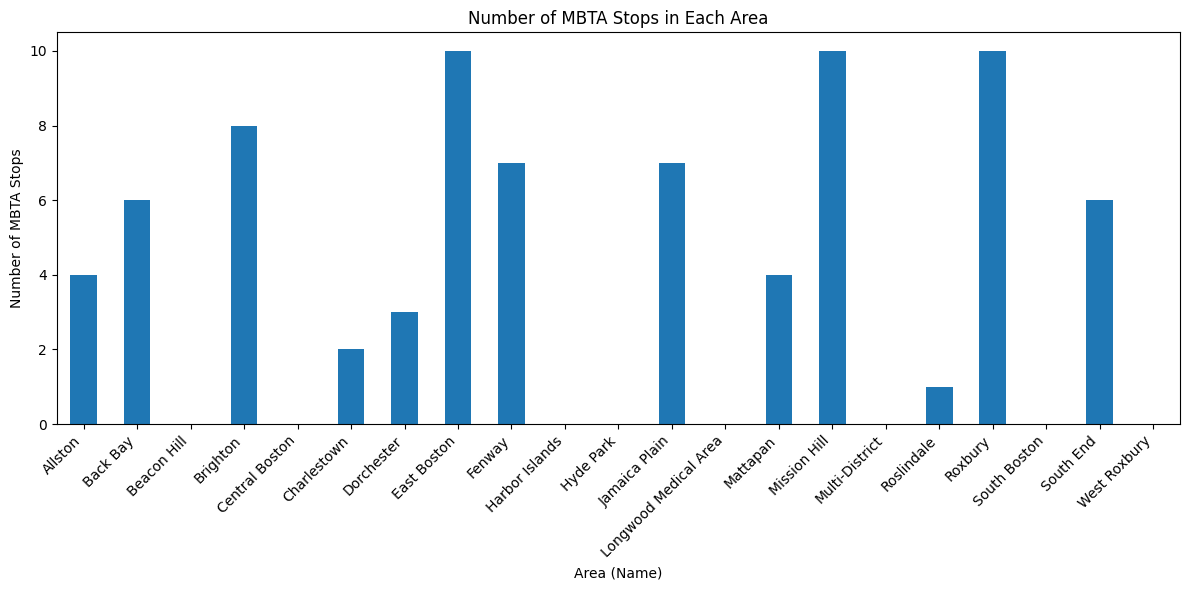

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('result.csv')

stops_by_area = df.groupby('Name')['MBTA_Stops_Count'].sum()

plt.figure(figsize=(12, 6))  

stops_by_area.plot(kind='bar')
plt.xlabel('Area (Name)')
plt.ylabel('Number of MBTA Stops')
plt.title('Number of MBTA Stops in Each Area')

plt.xticks(rotation=45, ha="right")

plt.tight_layout() 

plt.show()